## Fifteen-minute Friday #9

files needed = None

Fifteen-minute Fridays are brief, nongraded workbooks that provide some extra practice and introduce new topics for self-guided study. This week we are working on two more plot types that are a part of **matplotlib**:

1. Bar charts
2. Scatter plots

The solutions to the practice problems are at the end of the notebook.

In [1]:
import pandas as pd     
import matplotlib.pyplot as plt   
from pandas_datareader import data, wb    
import datetime as dt

%matplotlib inline      

## Bar charts
Bar charts are useful for describing relatively few observations of categorical data &mdash; meaning that one of the axes is not quantitative. [Tufte](https://www.edwardtufte.com/tufte) would complain that they have a lot of redundant ink, but they are quite popular...and Tufte is not our dictator. It's always good, however, to think about what our figures are doing for us.   

Bar charts are much better than pie charts for displaying the relative size of data. There are discussions of this all over the net (here is [one](http://www.storytellingwithdata.com/blog/2011/07/death-to-pie-charts) I like) but the anti-pie-chart argument boils down to: Pie charts are hard to read.   

1. Humans are bad at judging the relative sizes of 2D spaces. They cannot tell if one slice is 10% larger than another slice.
2. The MS-Excel style of coloring the slice different colors creates problems. Humans judge darker colors to have larger areas. 
2. To get quantitative traction, people label the slices with the data values. In this case, a table of numbers is probably a better way to share the data.

In [2]:
# PPP GDP data from the penn world tables. The units are thousands of USD. 

code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

gdp = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
gdp

,gdppc,country
USA,53.1,United States
FRA,36.9,France
JPN,36.3,Japan
CHN,11.9,China
IND,5.4,India
BRA,15.0,Brazil
MEX,16.5,Mexico


,gdppc,country
USA,53.1,United States
FRA,36.9,France
JPN,36.3,Japan
CHN,11.9,China
IND,5.4,India
BRA,15.0,Brazil
MEX,16.5,Mexico


The `ax.bar()` method ([docs](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html)) takes two pieces of data: A numerical value and a label. In our example, the numerical values are the gdp per capita measures and the labels are the country names or country codes. The simplest syntax is:

```python
ax.bar(labels, values)
```

but we can specify options like edge and face color, bar width, alpha, etc. As usual, see the documentation for more details and options.  

Let's plot gdp per capita and the country codes.

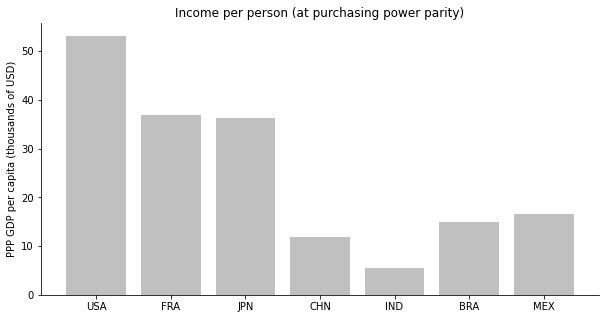

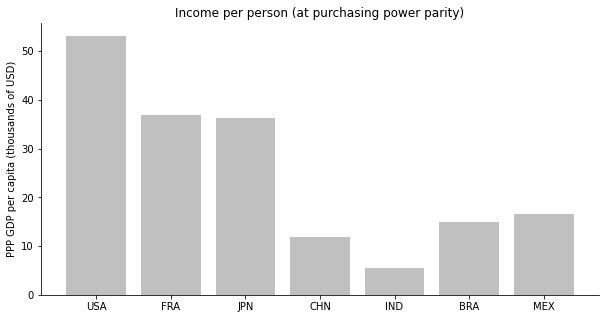

In [3]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(gdp.index, gdp['gdppc'], color='silver', alpha=1.0)     

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('PPP GDP per capita (thousands of USD)')
ax.set_title('Income per person (at purchasing power parity)')

plt.show()

This chart makes it easy to compare the levels of income per capita: India has about half the income of China; Brazil is about the same as Mexico,...

* I used a light color in the figure. There is a lot of ink here, and using blue or red really makes for a loud figure. Change the color to red and re-run the code above. What do you think? You could use alpha to soften a red or blue, also. [Here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) is a list of the named colors in matplotlib. Experiment!

* The x-axis data (the *labels*) are not quantitative. We could have used the country names instead of the codes and the message communicated by the figure would not have changed. 

* Since the labels are not quantitative, we are free to order the bars as we choose. We should choose something meaningful. Right now, the ordering is random. We could order alphabetically. Let's try ordering them poorest to richest.  We will use the `.sort_values()` method.


In [4]:
# Reminder: sort_values() sorts the DataFrame according to the values in a column. 
gdp.sort_values('gdppc')

,gdppc,country
IND,5.4,India
CHN,11.9,China
BRA,15.0,Brazil
MEX,16.5,Mexico
JPN,36.3,Japan
FRA,36.9,France
USA,53.1,United States


,gdppc,country
IND,5.4,India
CHN,11.9,China
BRA,15.0,Brazil
MEX,16.5,Mexico
JPN,36.3,Japan
FRA,36.9,France
USA,53.1,United States


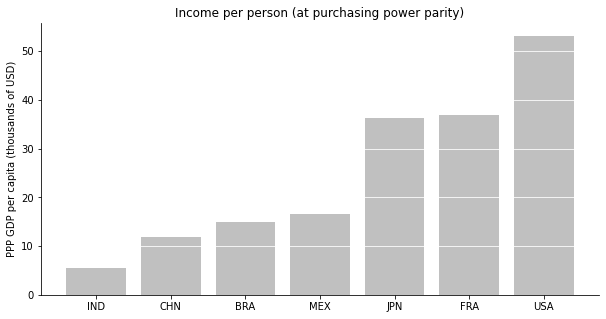

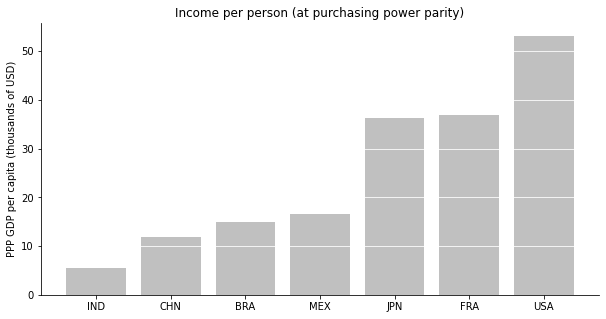

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(gdp.sort_values('gdppc').index, gdp.sort_values('gdppc')['gdppc'], color='silver', alpha=1.0)      
ax.grid(axis='y', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Income per person (at purchasing power parity)')
ax.set_ylabel('PPP GDP per capita (thousands of USD)')

plt.show()

Notice the use of `grid()` to specify grid lines on the y axis. I made them white, so they only show up in the bars. This is an alternative to, say, black grid lines. Grid lines are only informative where they cross the bars. Grid lines in the blank spaces are just extra ink. 

Take a look at the two examples below. Which conveys the most information with the least amount of ink?

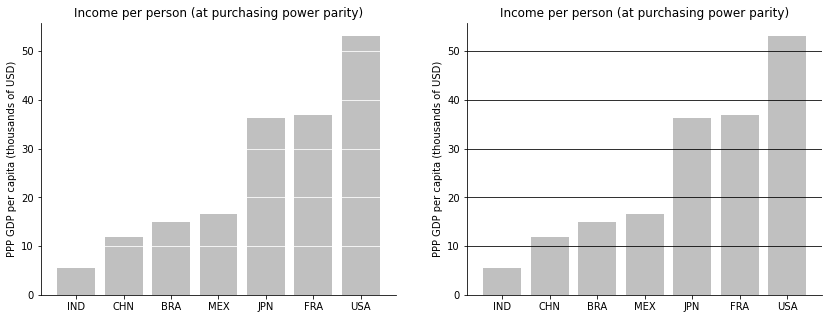

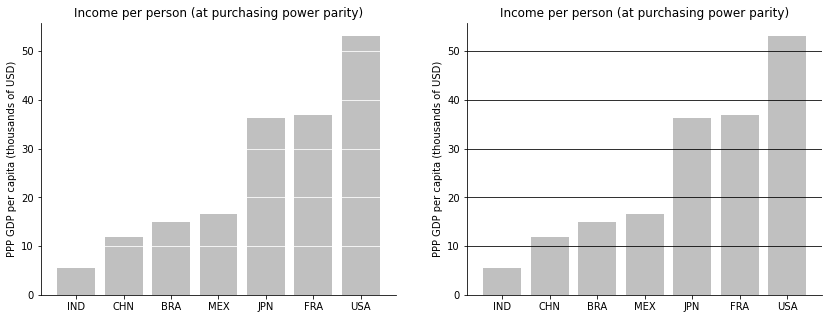

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))

for ax in axs:
    ax.bar(gdp.sort_values('gdppc').index, gdp.sort_values('gdppc')['gdppc'], color='silver', alpha=1.0)         
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title('Income per person (at purchasing power parity)')
    ax.set_ylabel('PPP GDP per capita (thousands of USD)')

    
axs[0].grid(axis='y', color='white')
axs[1].grid(axis='y', color='black')


plt.show()

## Practice: Bar charts

Maybe you prefer a horizontal bar chart. Same data, same approach. We just need to swap all the y labels for x labels. 

1. Create a horizontal bar chart of the gdp data we used above. Check the documentation for `.barh()`
2. Fix up your figure labels, etc. 

3. Create a new horizontal bar chart where each bar is gdp per capita relative to the United States. So USA =1, MEX = 0.31, etc.  

We have done this kind of thing before. By dividing through by U.S. gdppc, we are changing the **unit of measurement.** In our previous figures, the units were thousands of U.S. dollars. Now, the units are 'size relative to the United States'.  When we do this, we are *normalizing* the variable. This makes it even easier to see how other countries compare to the United States, which has the highest income in the group.

Note that we could have normalized by any country's gdppc. If we were doing a project about Mexico, it would make sense to normalize by Mexican gdppc so that we can see how other countries compare to Mexico.

## Scatter plots

Scatter plots are used to compare two variables. This is a good approach for visualizing the correlation of two variables. Let's get some data from FRED.

In [7]:
# These codes are for  real gdp and the unemployment rate in the United States. 
codes = ['GDPC1', 'UNRATE']  

start = dt.datetime(1970, 1, 1)
fred = data.DataReader(codes, 'fred', start)

fred.head()

,GDPC1,UNRATE
DATE,,
1970-01-01,4939.759,3.9
1970-02-01,NaN,4.2
1970-03-01,NaN,4.4
1970-04-01,4946.770,4.6
1970-05-01,NaN,4.8


,GDPC1,UNRATE
DATE,,
1970-01-01,4939.759,3.9
1970-02-01,NaN,4.2
1970-03-01,NaN,4.4
1970-04-01,4946.770,4.6
1970-05-01,NaN,4.8


Gremlins! The gdp data is quarterly, but the unemployment rate is monthly. Let's fix this by downsampling to quarterly frequency. The FRED datareader is really good &mdash; the index is already a datetime object. (How would you check?)

In [8]:
# Create an average quarterly unemployment rate.
fred_q=fred.resample('q').mean()                
fred_q.head()

,GDPC1,UNRATE
DATE,,
1970-03-31,4939.759,4.166667
1970-06-30,4946.770,4.766667
1970-09-30,4992.357,5.166667
1970-12-31,4938.857,5.833333
1971-03-31,5072.996,5.933333


,GDPC1,UNRATE
DATE,,
1970-03-31,4939.759,4.166667
1970-06-30,4946.770,4.766667
1970-09-30,4992.357,5.166667
1970-12-31,4938.857,5.833333
1971-03-31,5072.996,5.933333


Let's plot the growth rate of GDP against the change in the unemployment rate. The relationship between these two variables is known as [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law). 

Since the unemployment rates are already rates, it makes more sense to just difference them than to compute growth rates.

Example: $u_t$=1.25\% and $u_{t-1}$=0.75\%. 
It is clearer to say that the unemployment rate rose by 0.5 percentage points than to say that it rose by 67\%. 


In [9]:
# Compute the growth rate of gdp. 
fred_q['gdp_gr'] = fred_q['GDPC1'].pct_change()*100        

# .difference() takes the first difference: u(t)-u(t-1).   
fred_q['unemp_dif'] = fred_q['UNRATE'].diff()              
fred_q.head()

,GDPC1,UNRATE,gdp_gr,unemp_dif
DATE,,,,
1970-03-31,4939.759,4.166667,NaN,NaN
1970-06-30,4946.770,4.766667,0.141930,0.600000
1970-09-30,4992.357,5.166667,0.921551,0.400000
1970-12-31,4938.857,5.833333,-1.071638,0.666667
1971-03-31,5072.996,5.933333,2.715993,0.100000


,GDPC1,UNRATE,gdp_gr,unemp_dif
DATE,,,,
1970-03-31,4939.759,4.166667,NaN,NaN
1970-06-30,4946.770,4.766667,0.141930,0.600000
1970-09-30,4992.357,5.166667,0.921551,0.400000
1970-12-31,4938.857,5.833333,-1.071638,0.666667
1971-03-31,5072.996,5.933333,2.715993,0.100000


We are ready to plot. The `ax.scatter()` method ([docs](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html)) takes two pieces of data: the x variable and the y variable. 

```python
ax.scatter(x, y)
```

In our example, the x variable is the gdp growth rate and the y variable is the change in the unemployment rate. 

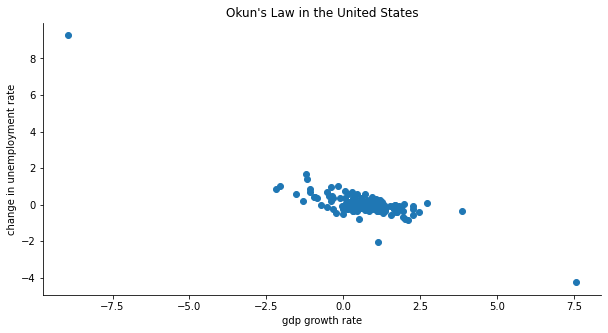

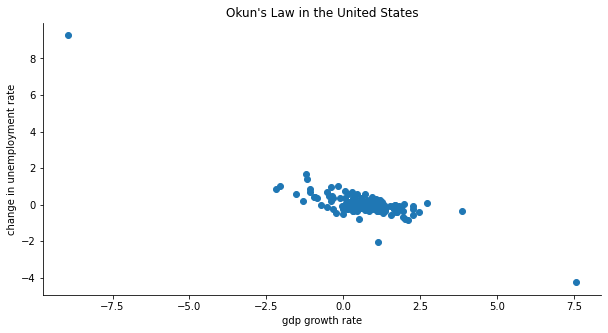

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q['gdp_gr'], fred_q['unemp_dif'])

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Clearly, there is a negative correlation here: Low gdp growth rates are associated with positive changes in the unemployment rate. When gdp is growing slowly (or falling) unemployment is rising. 

## Practice: Scatters

Let's explore some of scatter plot's options. Use the [documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) for help.  

Modify the Okun's Law figure we just made. 

1. Change the color of the dots to red.
2. Change the edgecolor of the markers to black. (markers have edges and faces)
3. Use the `s` option to set the size of the markers (in points squared) to 70.


Check out the documentation for [marker styles](https://matplotlib.org/api/markers_api.html). These styles can be used with `.plot()` command, too. 

3. Change the marker to a triangle. 
4. Use `text()` or `annotate()` to label the point corresponding to third quarter 2009: '2009Q3'

Scatter plots are very useful and we can do a lot more with them. Places to go from here.

1. Add a line of best fit. A bit clunky in matplotlib (use np's polyfit command), but not too bad. The seaborn package has a regplot command that makes this dead simple. 
2. Make data markers different colors or sizes depending on the value of a third variable. For example, you could get some more data and color the markers for years with a repbulican president red and markers for years with democratic presidents blue. 
3. Other ideas?


## Practice: Bar charts

Maybe you prefer a horizontal bar chart. Same data, same approach. We just need to swap all the y labels for x labels. 

1. Create a horizontal bar chart of the gdp data we used above. Check the documentation for `.barh()`
2. Fix up your figure labels, etc. 

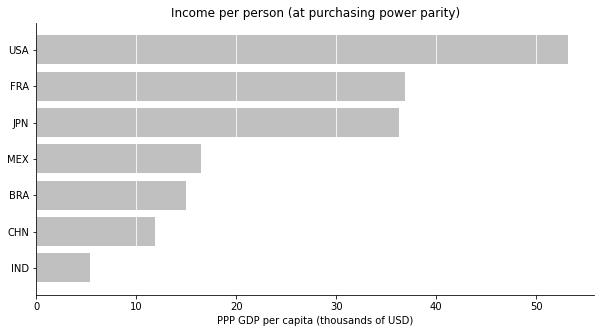

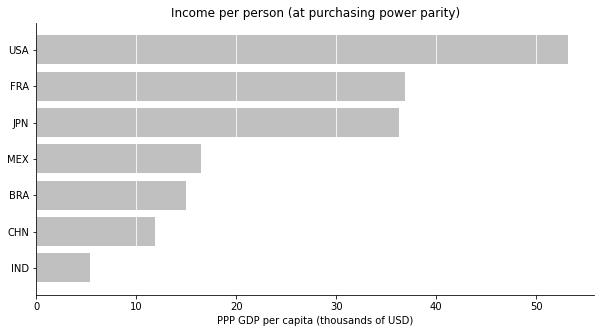

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

gdp_sort= gdp.sort_values('gdppc')

ax.barh(gdp.sort_values('gdppc').index, gdp.sort_values('gdppc')['gdppc'], color='silver')      
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('PPP GDP per capita (thousands of USD)')
ax.set_title('Income per person (at purchasing power parity)')

plt.show()

3. Create a new horizontal bar chart where each bar is gdp per capita relative to the United States. So USA =1, MEX = 0.31, etc.  

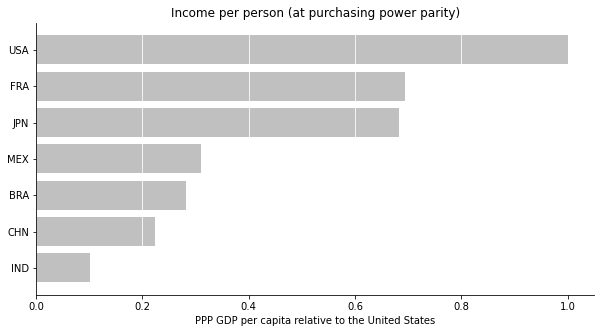

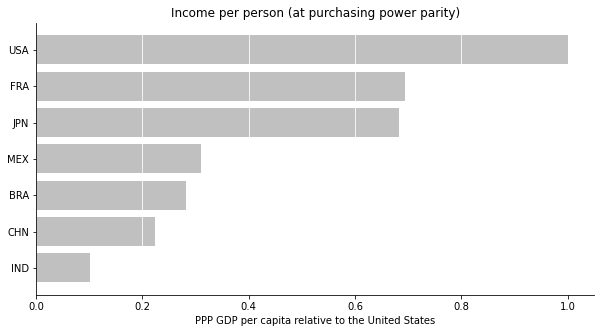

In [12]:
# Divide all country gdppc by the US gdppc
gdp['rel_gdp'] = gdp['gdppc']/gdp.loc['USA', 'gdppc']

# Now plot
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(gdp.sort_values('gdppc').index, gdp.sort_values('gdppc')['rel_gdp'], color='silver')
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('PPP GDP per capita relative to the United States')
ax.set_title('Income per person (at purchasing power parity)')

plt.show()

We have done this kind of thing before. By dividing through by U.S. gdppc, we are changing the **unit of measurement.** In our previous figures, the units were thousands of U.S. dollars. Now, the units are 'size relative to the United States'.  When we do this, we are *normalizing* the variable. This makes it even easier to see how other countries compare to the United States, which has the highest income in the group.

Note that we could have normalized by any country's gdppc. If we were doing a project about Mexico, it would make sense to normalize by Mexican gdppc so that we can see how other countries compare to Mexico.

## Practice: Scatters

Let's explore some of scatter plot's options. Use the [documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) for help.  

Modify the Okun's Law figure we just made. 

1. Change the color of the dots to red.
2. Change the edgecolor of the markers to black. (markers have edges and faces)
3. Use the `s` option to set the size of the markers (in points squared) to 70.


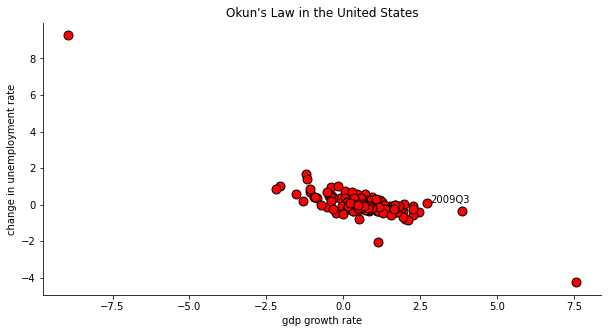

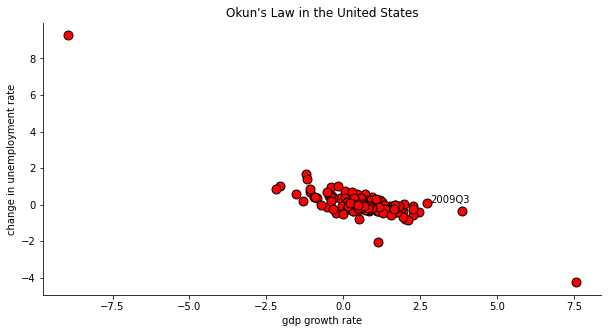

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q.gdp_gr, fred_q.unemp_dif, 
           color='red', 
           edgecolor='black',
           s = 80)

ax.text(fred_q.loc['1971-3-31', 'gdp_gr']+0.1, fred_q.loc['1971-3-31', 'unemp_dif'], '2009Q3', ha='left')

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Check out the documentation for [marker styles](https://matplotlib.org/api/markers_api.html). These styles can be used with `.plot()` command, too. 

3. Change the marker to a triangle. 
4. Use `text()` or `annotate()` to label the point corresponding to third quarter 2009: '2009Q3'

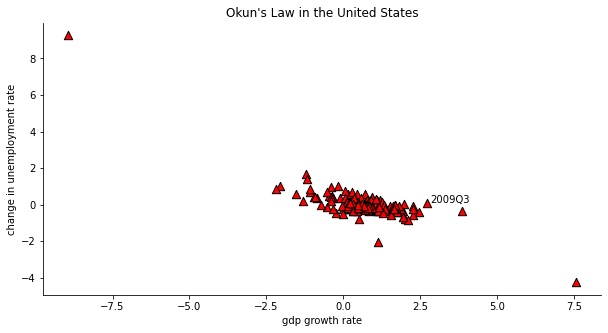

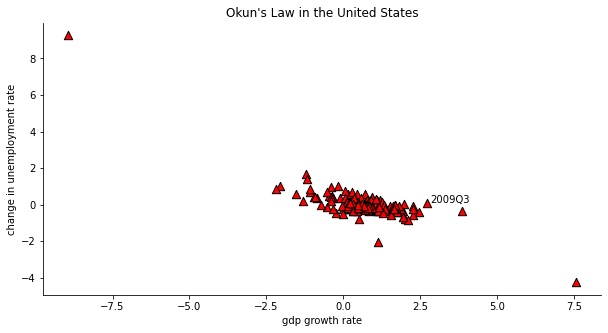

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q.gdp_gr, fred_q.unemp_dif, 
           color='red', 
            marker = '^', 
           edgecolor='black',
           s = 70)

ax.text(fred_q.loc['1971-3-31', 'gdp_gr']+0.1, fred_q.loc['1971-3-31', 'unemp_dif'], '2009Q3', ha='left')

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Scatter plots are very useful and we can do a lot more with them. Places to go from here.

1. Add a line of best fit. A bit clunky in matplotlib (use np's polyfit command), but not too bad. The seaborn package has a regplot command that makes this dead simple. 
2. Make data markers different colors or sizes depending on the value of a third variable. For example, you could get some more data and color the markers for years with a repbulican president red and markers for years with democratic presidents blue. 
3. Other ideas?
